In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score


## Question 1 
#### Chargement et exploitation des données 

In [4]:
wine = load_wine()
X = wine.data
y = wine.target 
feature_names = wine.feature_names
target_names = wine.target_names

In [5]:
print("Dimensions du jeu de données Wine :")
print(f"Nombre d'echantillons:{X.shape[0]}")
print(f"Nombre de caractéristiques : {X.shape[1]}")
print("Noms des caractéristiques :")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")

print("Classes cible:")
for i, target in enumerate(target_names):
    print(f"{i}. {target}")

Dimensions du jeu de données Wine :
Nombre d'echantillons:178
Nombre de caractéristiques : 13
Noms des caractéristiques :
1. alcohol
2. malic_acid
3. ash
4. alcalinity_of_ash
5. magnesium
6. total_phenols
7. flavanoids
8. nonflavanoid_phenols
9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline
Classes cible:
0. class_0
1. class_1
2. class_2


#### Conversion en DataFrame pour visualisation

In [6]:
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['target'] = y

In [7]:
#aperçu des données 
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
#description statistique
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Question 2 : Application de K-means dans differentes situations
### (a) Sur les données brutes (non normalisées) 

In [9]:
kmeans_raw = KMeans(n_clusters=3, random_state=42)
start_time_raw = time.time()
labels_raw = kmeans_raw.fit_predict(X)
time_raw = time.time() - start_time_raw

### (b) Sur les données normalisées avec StandardScaler 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
start_time_scaled = time.time()
labels_scaled = kmeans_scaled.fit_predict(X_scaled)
time_scaled = time.time() - start_time_scaled

### (c) Sur les 2 premieres composantes principales (PCA) des données brutes

In [11]:
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)
kmeans_pca_raw = KMeans(n_clusters=3, random_state=42)
start_time_pca_raw = time.time()
labels_pca_raw = kmeans_pca_raw.fit_predict(X_pca_raw)
time_pca_raw = time.time() - start_time_pca_raw

### (d) Sur les 2 premieres composantes principales (PCA) des données normalisées

In [12]:
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)
kmeans_pca_scaled = KMeans(n_clusters=3, random_state=42)
start_time_pca_scaled = time.time()
labels_pca_scaled = kmeans_pca_scaled.fit_predict(X_pca_scaled)
time_pca_scaled = time.time() - start_time_pca_scaled

## Question 3 : Calcul des métriques d'évaluation 

In [13]:
#definition d'une fonction pour calculer toutes les métriques 
def calcul_metrics(y_true, y_pred, X_data):
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    silhouette = silhouette_score(X_data, y_pred)
    return ari, nmi, silhouette

In [14]:
#calcul des metriques pour chaque cas
metrics_raw = calcul_metrics(y, labels_raw, X)
metrics_scaled = calcul_metrics(y, labels_scaled, X_scaled)
metrics_pca_raw = calcul_metrics(y, labels_pca_raw, X_pca_raw)
metrics_pca_scaled = calcul_metrics(y, labels_pca_scaled, X_pca_scaled)

In [15]:
#creation de tableau recapitulatif des metriques
metrics_df = pd.DataFrame({
    'Metrique' : ['ARI', 'NMI', 'Silhouette'],
    'Données brutes' : metrics_raw,
    'Données normalisées': metrics_scaled,
    'PCA sur données brutes' : metrics_pca_raw,
    'PCA sur données normalisées' : metrics_pca_scaled
})

In [16]:
#formatage pour l'affichage
metrics_display = pd.DataFrame({
    'Metrique' : ['ARI', 'NMI', 'Silhouette'],
    'Données brutes' : [f"{m:.4f}" for m in metrics_raw],
    'Données normalisées': [f"{m:.4f}" for m in metrics_scaled],
    'PCA sur données brutes' : [f"{m:.4f}" for m in metrics_pca_raw],
    'PCA sur données normalisées' : [f"{m:.4f}" for m in metrics_pca_scaled]
})

In [17]:
print("Tableau récapitulatif des métriques:")

Tableau récapitulatif des métriques:


In [18]:
metrics_display

,Metrique,Données brutes,Données normalisées,PCA sur données brutes,PCA sur données normalisées
0,ARI,0.3518,0.8975,0.3518,0.8962
1,NMI,0.4233,0.8759,0.4233,0.8656
2,Silhouette,0.5596,0.2849,0.5603,0.5602


<span style="color:red">Remarque : </span> Le meilleur clustering est obtenu avec les données normalisées (ARI=0.89, NMI=0.87), confirmant que la standarisation est cruciale pour K-means. La PCA n'apporte pas d'améliration significative ici, mais peut être utile pour d'autres besoins comme la visualisation ou la simplification.

## Question 4 : Visualisation des résultats avec PCA

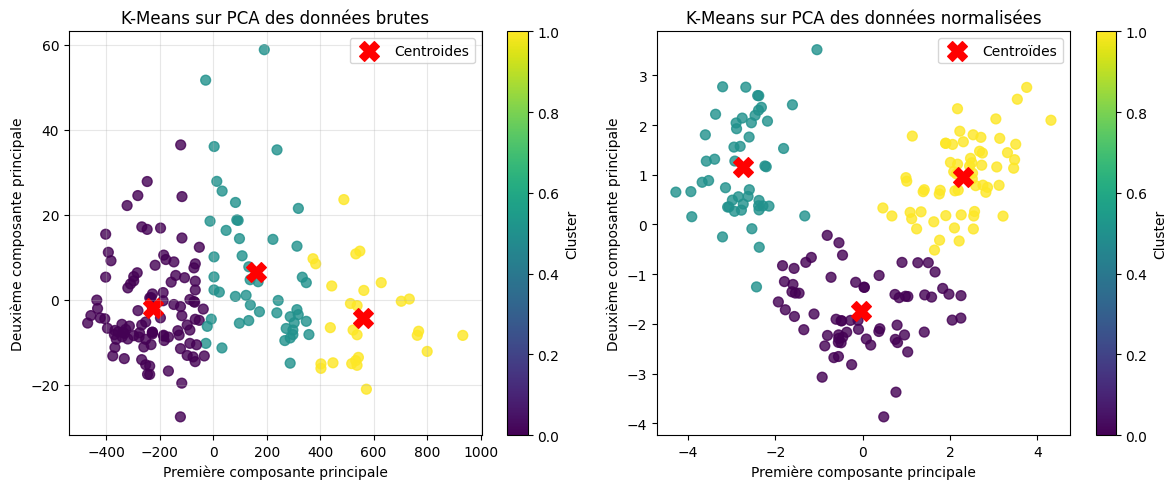

In [19]:

#### PCA pour des données brutes (c)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca_raw[:,0], X_pca_raw[:,1], c=labels_pca_raw, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans_pca_raw.cluster_centers_[:,0], kmeans_pca_raw.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroides')
plt.title('K-Means sur PCA des données brutes')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)

#### PCA pour des données normalisées (d)
plt.subplot(1, 2, 2)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=labels_pca_scaled, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans_pca_scaled.cluster_centers_[:, 0], kmeans_pca_scaled.cluster_centers_[:, 1], 
           c='red', marker='X', s=200, label='Centroïdes')
plt.title('K-Means sur PCA des données normalisées')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

<span style="color:red">Remarque : </span> D'après la comparaison visuelle on peut remarquer que la normalisation a un impact crucial. <span style="color:blue">Sans normalisation</span>, les clusters sont biaisés par l'échelles des variables, tandis qu'<span style="color:blue">avec normalisation</span>, ils reflètent mieux la structure réelle des données.

## Question 5

La normalisation est cruciale pour K-Means car l'algorithme utilise la distance euclidienne.<br>
Sans normalisation, les variables avec de grandes échelles domineront le calcul de distance,
ce qui peut conduire à des clusters biaisés qui ne reflètent pas la véritable structure des données.

## Question 6

In [20]:
metrics_display

,Metrique,Données brutes,Données normalisées,PCA sur données brutes,PCA sur données normalisées
0,ARI,0.3518,0.8975,0.3518,0.8962
1,NMI,0.4233,0.8759,0.4233,0.8656
2,Silhouette,0.5596,0.2849,0.5603,0.5602


D'après le calcul des metriques, la PCA n'apporte aucun gain significatif pour la correspondance avec les labels réels, malgré l'augmentation du score de silhouette, mais cette metrique est mois fiable que l'ARI/NMI si les vrais labels sont connus. Contrairement à la normalisation, on remarque qu'il y a une augmentation des score ARI et NMI par rapport aux données brutes.<br>Pour conclure, **LA PCA seule n'améliore pas la qualité du clustering par rapport à la simple normalisation.**

## Question 7 : comparaison des temps d'execution

In [23]:
#les temps déjà calculés dans la question 2
times_df = pd.DataFrame({
    'Configuration': ['PCA sur données brutes', 'PCA sur données normalisées'],
    'Temps d\'exécution (s)': [time_pca_raw, time_pca_scaled]
})


In [24]:
print("\nComparaison des temps d'exécution:")
print(times_df)


Comparaison des temps d'exécution:
                 Configuration  Temps d'exécution (s)
0       PCA sur données brutes               0.006067
1  PCA sur données normalisées               0.005575


<span style="color:red">Remarque : </span>L'approche PCA sur données normalisées est plus rapide que sur les données normalisées complètes.
Cela est dû à la réduction du nombre de dimensions, ce qui réduit la complexité des calculs.

## Question 8 : Essai d'autres methodes de normalisation

#### MinMaxScaler 

In [26]:
min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)
kmeans_min_max = KMeans(n_clusters=3, random_state=42)
labels_min_max = kmeans_min_max.fit_predict(X_min_max)
metrics_min_max = calcul_metrics(y, labels_min_max, X_min_max)

#### RobustScaler

In [27]:
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)
kmeans_robust = KMeans(n_clusters=3, random_state=42)
labels_robust = kmeans_robust.fit_predict(X_robust)
metrics_robust = calcul_metrics(y, labels_robust, X_robust)

#### Normalizer 

In [29]:
normalizer = Normalizer()
X_norm = normalizer.fit_transform(X)
kmeans_norm = KMeans(n_clusters=3, random_state=42)
labels_norm = kmeans_norm.fit_predict(X_norm)
metrics_norm = calcul_metrics(y, labels_norm, X_norm)

#### Ajout des résultats au tableau de métriques

In [30]:
scalers_df = pd.DataFrame({
    'Metrique': ['ARI', 'NMI', 'Silhouette'],
    'StandardScaler': [f"{m:.4f}" for m in metrics_scaled],
    'MinMaxScaler': [f"{m:.4f}" for m in metrics_min_max],
    'RobustScaler': [f"{m:.4f}" for m in metrics_robust],
    'Normalizer': [f"{m:.4f}" for m in metrics_norm]
})

In [31]:
print("\nComparaison des différentes méthodes de normalisation:")


Comparaison des différentes méthodes de normalisation:


In [32]:
scalers_df

,Metrique,StandardScaler,MinMaxScaler,RobustScaler,Normalizer
0,ARI,0.8975,0.8537,0.8636,0.3470
1,NMI,0.8759,0.8417,0.8473,0.3823
2,Silhouette,0.2849,0.3009,0.2645,0.5233


In [33]:
best_method_name = scalers_df.iloc[0, 1:].astype(float).idxmax()
print(f"\nLa meilleure méthode de normalisation selon ARI est: {best_method_name}")


La meilleure méthode de normalisation selon ARI est: StandardScaler


In [34]:
best_method_name = scalers_df.iloc[1, 1:].astype(float).idxmax()
print(f"\nLa meilleure méthode de normalisation selon NMI est: {best_method_name}")


La meilleure méthode de normalisation selon NMI est: StandardScaler


<span style="color:red">Conclusion : </span>StandardScaler est la méthode de normalisation optimale pour ce jeu de données, offrant le meilleur compromis entre qualité de clustering (ARI/NMI élevés) et stabilité. Les autres méthodes, bien qu'utiles dans certains contextes, ne surpassent pas StandardScaler ici."